<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/dimension_reduction/linear_discriminant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LDA(Linear Discriminant Analysis) - 선형 판별 분석법
: PCA와 매우 유사하지만 지도학습 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대로 유지하면서 차원을 축소함
- 입력데이터의 결정 값 클래스를 최대한 분리할 수 있는 축을 찾음

특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해  
 클래스간 분산(between-class scatter)와 클래스 내부 분산(within-class scatter)의 비율을 최대화 하는 방식으로 차원을 축소함

**즉 클래스 간 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식**

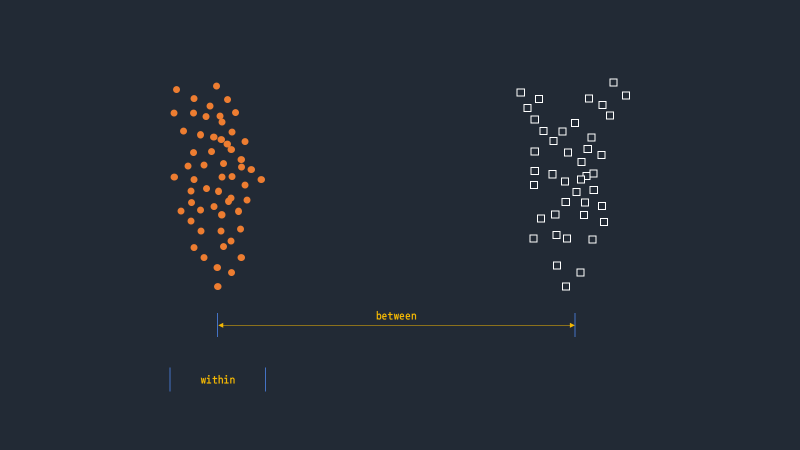

좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부 분산이 작은것을 표현한 그림이다.  


## Step
1. 클래스 내부와 클래스간 분산 행렬을 구함
- 이 두개의 행렬은 입력 데이터의 결정 값 클래스별로 개별 피처의 평균 벡터(mean vector)를 기반으로 구함
2. 클래스 내부 분산 행렬을 $S_2$, 클래스 간 분산 행렬을 $S_B$라고 하면 다음 식으로 두 행렬을 고유벡터로 분해할 수 있음
$$S_W^TS_B = \left [ e_1\cdots e_n \right ]\begin{bmatrix}\lambda_1&\cdots&0\\
\cdots&\cdots&\cdots\\
0&\cdots&\lambda_n\\
\end{bmatrix}\begin{bmatrix}
e_1^T\\\cdots\\e_n^T
\end{bmatrix}$$
3. 고유값이 가장 큰 순으로 K개(LDA 변환 차수만큼) 추출함
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함

## 코드구현
- 붓꽃 데이터 세트에 LDA에 적용

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
# 표준 정규 분포로 스케일링
iris_scaled = StandardScaler().fit_transform(iris.data)

In [2]:
#2개의 컴포넌트로 붓꽃 데이터를 LDA 변환
# PCA에 다른점은 LDA는 지도학습 - fit에 target값이 적용됨
num = 2
lda = LinearDiscriminantAnalysis(n_components=num)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)


(150, 2)


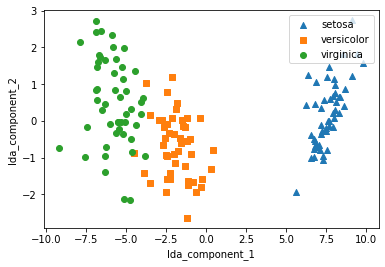

In [4]:
#LDA로 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
iris_df_lda = pd.DataFrame(iris_lda, columns = lda_columns)
iris_df_lda['target'] = iris.target

markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_1']
  y_axis_data = iris_df_lda[iris_df_lda['target'] == i]['lda_component_2']

  plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()